# Organizando el código

In [335]:
from qutip import *
import qutip as qt


import numpy as np
import matplotlib.pyplot as plt

## Base fotónica

In [336]:
#Estado de vacío |0>:
p0=fock(4,0)

#primer estado excitado |1>:
p1=fock(4,1)

#segundo estado excitado |2>:
p2=fock(4,2)

#tercero estado excitado |3>:
p3=fock(4,3)

## Base de Materia

In [337]:
#Valor del momentum angular total
j = 3

#Según el valor de j, m puede tener 2*j...
jj=int(2*j)

#...más 1, el valor m=0


#Base de Dicke

#|-J+3> Máximo estado excitado
d3=qt.basis(jj + 1,jj-3)

#|-J+2>
d2=qt.basis(jj + 1,jj-2)

#|-J+1> 
d1=qt.basis(jj + 1,jj-1)

#|-J> Estado base 
d0=qt.basis(jj + 1,jj)

## Base global

In [338]:
# |-J,3>
d0p3=tensor([d0,p3])
# |-J+1,2>
d1p2=tensor([d1,p2])
# |-J+2,1>
d2p1=tensor([d2,p1])
# |-J+3,0>
d3p0=tensor([d3,p0])

# SIN INTERACCIONES

## Sistema a Resolver

In [339]:
N=4
jmin=tensor(jmat(j,'-'), identity(N))
a=tensor(identity(jmin.dims[0][0]),destroy(N))

#Lo que me hace el hamiltoniano
def sin(N,n,j,wc,wa,A):
    #Operadores de momentum angular para los emisores
    jz=tensor(jmat(j,'z'), identity(N))
    jmin=tensor(jmat(j,'-'), identity(N))
    jmax=tensor(jmat(j,'+'), identity(N))
    a=tensor(identity(jmin.dims[0][0]),destroy(N))
    g=A/((n)**(1/2))

    #Hamiltoniano
    sin=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax)
    return sin

#Este es mi hamiltoniano
este=sin(4,3,j,1,1,0.1)   

# -----------------------------------------------------------------------------

#Forma de hallar la dinámica

tiempo=12000

def dinamicasin(n0,n3,tiempo,htc):
    star=n0*p0+n3*p3
    initial=tensor(d0,star)
    tlist=np.linspace(start=0,stop=tiempo,num=tiempo)
    resultado=sesolve(htc, initial, tlist, e_ops=None, args=None, options=None, progress_bar=True, _safe_mode=True)
    return resultado

resultado=dinamicasin(((2)**(1/2))/3, ((7)**(1/2))/3,tiempo,este)
len(resultado.states)

10.0%. Run time:   0.44s. Est. time left: 00:00:00:03
20.0%. Run time:   0.88s. Est. time left: 00:00:00:03
30.0%. Run time:   1.36s. Est. time left: 00:00:00:03
40.0%. Run time:   1.78s. Est. time left: 00:00:00:02
50.0%. Run time:   2.27s. Est. time left: 00:00:00:02
60.0%. Run time:   2.73s. Est. time left: 00:00:00:01
70.0%. Run time:   3.12s. Est. time left: 00:00:00:01
80.0%. Run time:   3.60s. Est. time left: 00:00:00:00
90.0%. Run time:   4.05s. Est. time left: 00:00:00:00
Total run time:   4.54s


12000

## Graficas

### Entropía Lineal y Función de correlación óptica de segundo orden

Generando gráfica:   0%|                                           | 1/620 [00:00<00:43, 14.28it/s]


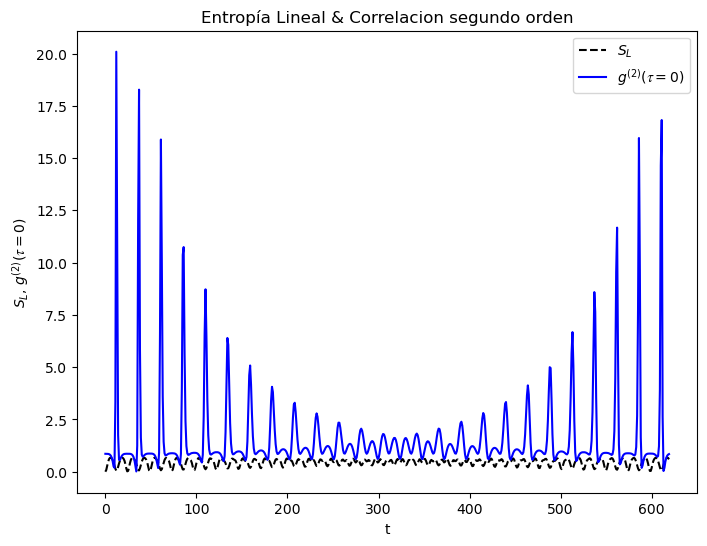

In [340]:
def rho(x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser UN número menor al número de estados puestos en el linspace del sesolve"
    
    return(resultado.states[x]*resultado.states[x].dag())

# -------------------------------------------------------------------------------

def entropia (x):
    "Entropía lineal usando un ket"
    rho(x)
    return(entropy_linear(rho(x).ptrace(0)))

# ------------------------------------------------------------------------------

#operadores para crear la función de correlacion óptica de segundo orden
up=a.dag()*a.dag()*a*a
down=a.dag()*a

#Funcion de correlacion
def correlacion (x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser un número menor al número de estados puestos en el linspace del sesolve"
    numerador=expect(up, resultado.states[x])
    denominador=expect(down, resultado.states[x])*expect(down, resultado.states[x])
    return(numerador/denominador)

# -------------------------------------------------------------------------------

def entropiaycorrelacion(final):
    
    from tqdm import tqdm
    import time
    "Grafica entropía lineal y función de correlación óptica de segundo orden."
    "Argumento: final"
    "Corresponde al valor más grande de la absisa de la gráfica"
    
    
    x_vals=[i for i in range(final)]
    
    y2_vals=[]
    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))
    y1_vals=[]
    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))
        
    barra_progreso = tqdm(total=len(x_vals), desc='Generando gráfica')

    # Graficar las dos funciones superpuestas
    plt.figure(figsize=(8, 6))
    # Graficar la primera función
    plt.plot(x_vals, y1_vals, label='$S_L$', linestyle='--',color='black')
    # Graficar la segunda función
    plt.plot(x_vals, y2_vals, label='$g^{(2)}(𝜏=0)$', linestyle='-', color='blue')



    plt.title('Entropía Lineal & Correlacion segundo orden')
    plt.xlabel('t')
    plt.ylabel('$S_L$, $g^{(2)}(𝜏=0)$')
    plt.legend()
    plt.grid(False)
    
    barra_progreso.update(1)
    barra_progreso.close()

    plt.show()
    
    
entropiaycorrelacion(620)

Solo entropia

In [341]:
def entro(final):
    x_vals=[i for i in range(final)]
    y1_vals=[]

    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y1_vals, linestyle='-', color='black')
    plt.title('Entropía Lineal vs tiempo')
    plt.xlabel('t')
    plt.ylabel('Entropía Lineal')
    plt.legend()
    plt.grid(False)
    plt.show()
    
# entro (620)

Solo correlacion

In [342]:
#operadores para crear la función de correlacion óptica de segundo orden
up=a.dag()*a.dag()*a*a
down=a.dag()*a

#Funcion de correlacion
def correlacion (x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser un número menor al número de estados puestos en el linspace del sesolve"
    numerador=expect(up, resultado.states[x])
    denominador=expect(down, resultado.states[x])*expect(down, resultado.states[x])
    return(numerador/denominador)

def corre (final):
    #x es un valor menor a num, que corresponde al valor del eje x de la grafica
    x_vals=[i for i in range(final)]

    #Valores de función de correlacion de segundo orden para el estado x
    y2_vals=[]

    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))

    # Graficar los valores de x e y
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y2_vals, linestyle='-', color='b')
    plt.title('Entropía Lineal vs tiempo')
    plt.xlabel('t')
    plt.ylabel('Entropía Lineal')
    plt.legend()
    plt.grid(False)
    plt.show()
    
# corre(620)

### Matrices de densidad reducidas

#### Fotónica

(<Figure size 800x600 with 2 Axes>, <Axes: title={'center': 'p_ph'}>)

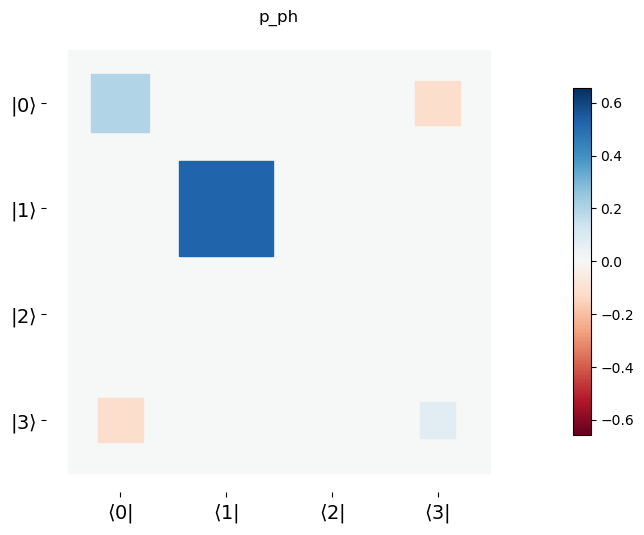

In [343]:
def mdr (t,elemento):
    't: es el instante en el que quiero ver como es la matriz de densidad reducida'
    'elemento: 0 o 1. 0:se observa p_D; 1: se observa p_ph '
    if elemento==0:
        title='p_D'
    else:
        title='p_ph'
        
    s=hinton(rho(t).ptrace(elemento), xlabels=None, ylabels=None, title=title, ax=None, cmap=None, label_top=False, color_style='scaled')
    return s
mdr(300,1)

#### De materia

(<Figure size 800x600 with 2 Axes>, <Axes: title={'center': 'p_D'}>)

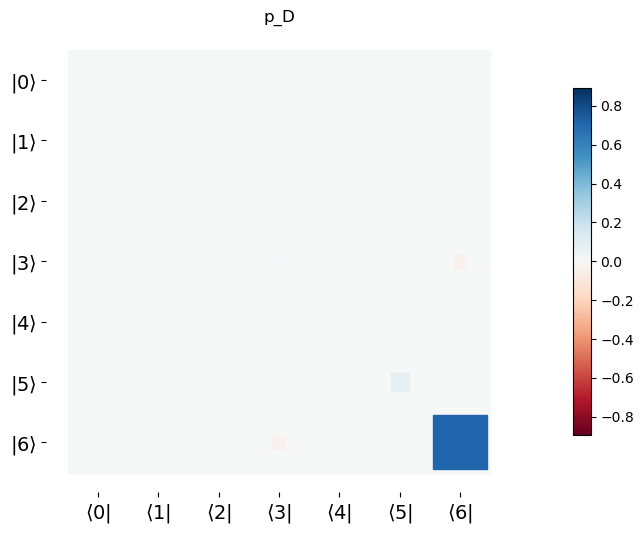

In [344]:
mdr(600,0)

# CON INTERACCIONES



### Ising

In [345]:
N=4
jmin=tensor(jmat(j,'-'), identity(N))
a=tensor(identity(jmin.dims[0][0]),destroy(N))

#Lo que me hace el hamiltoniano
def ising(N,n,j,wc,wa,A,tising):
    #Operadores de momentum angular para los emisores
    jz=tensor(jmat(j,'z'), identity(N))
    jmin=tensor(jmat(j,'-'), identity(N))
    jmax=tensor(jmat(j,'+'), identity(N))
    a=tensor(identity(jmin.dims[0][0]),destroy(N))
    g=A/((n)**(1/2))

    #Hamiltoniano
    ising=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax)+tising*jz
    return ising

#Este es mi hamiltoniano
este=ising(4,3,j,1,1,0.1,2*0.01)   

# -----------------------------------------------------------------------------

#Forma de hallar la dinámica

tiempo=1200

def dinamicasin(n0,n3,tiempo,htc):
    star=n0*p0+n3*p3
    initial=tensor(d0,star)
    tlist=np.linspace(start=0,stop=tiempo,num=tiempo)
    resultado=sesolve(htc, initial, tlist, e_ops=None, args=None, options=None, progress_bar=True, _safe_mode=True)
    return resultado

resultado=dinamicasin(((2)**(1/2))/3, ((7)**(1/2))/3,tiempo,este)
len(resultado.states)

10.0%. Run time:   0.05s. Est. time left: 00:00:00:00
20.0%. Run time:   0.11s. Est. time left: 00:00:00:00
30.0%. Run time:   0.14s. Est. time left: 00:00:00:00
40.0%. Run time:   0.21s. Est. time left: 00:00:00:00
50.0%. Run time:   0.25s. Est. time left: 00:00:00:00
60.0%. Run time:   0.30s. Est. time left: 00:00:00:00
70.0%. Run time:   0.36s. Est. time left: 00:00:00:00
80.0%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.53s


1200

## Graficas

Generando gráfica:   0%|                                           | 1/900 [00:00<00:46, 19.52it/s]


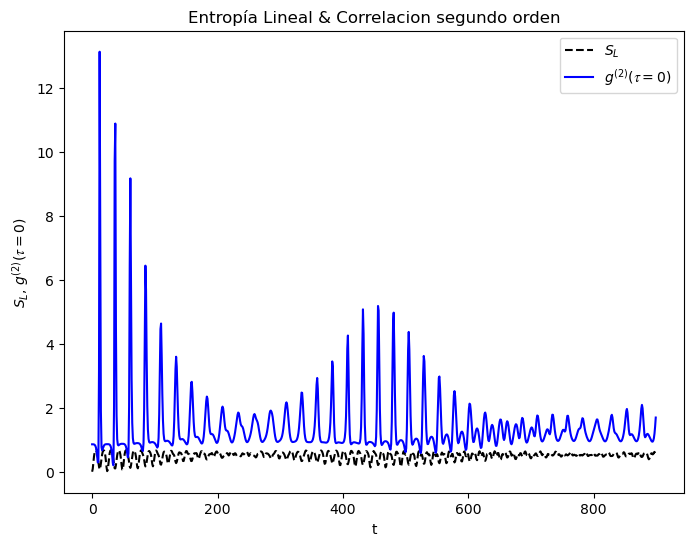

In [346]:
entropiaycorrelacion(900)

(<Figure size 800x600 with 2 Axes>, <Axes: title={'center': 'p_ph'}>)

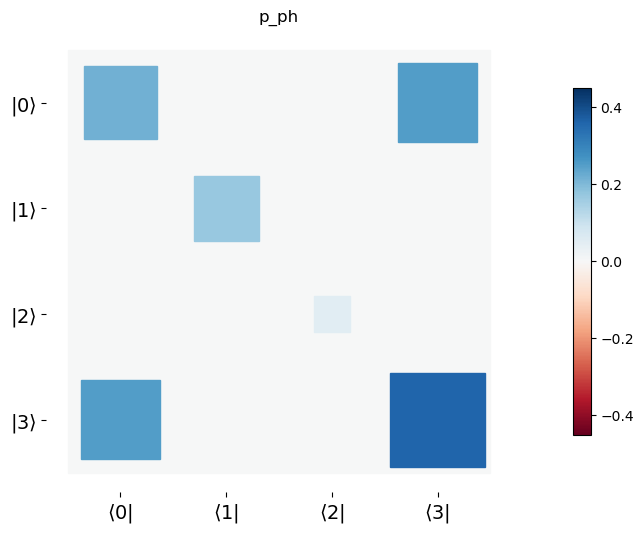

In [347]:
mdr(300,1)

(<Figure size 800x600 with 2 Axes>, <Axes: title={'center': 'p_D'}>)

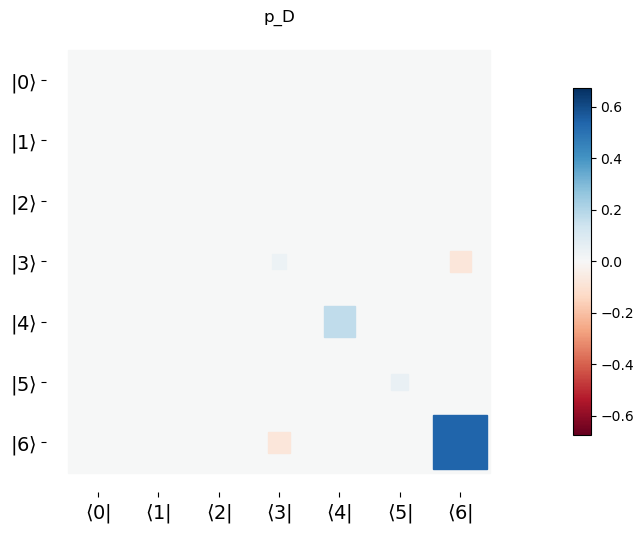

In [348]:
mdr(300,0)

### Dipolo-dipolo

In [349]:
N=4
jmin=tensor(jmat(j,'-'), identity(N))
a=tensor(identity(jmin.dims[0][0]),destroy(N))

#Lo que me hace el hamiltoniano
def dipolo(N,n,j,wc,wa,A,tdipolo):
    #Operadores de momentum angular para los emisores
    jz=tensor(jmat(j,'z'), identity(N))
    jmin=tensor(jmat(j,'-'), identity(N))
    jmax=tensor(jmat(j,'+'), identity(N))
    a=tensor(identity(jmin.dims[0][0]),destroy(N))
    g=A/((n)**(1/2))

    #Hamiltoniano
    dipolo=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax)+tdipolo*(jmax+jmin)
    return dipolo

#Este es mi hamiltoniano
este=dipolo(4,3,j,1,1,0.1,2*0.4)   

# -----------------------------------------------------------------------------

#Forma de hallar la dinámica

tiempo=1200

def dinamicasin(n0,n3,tiempo,htc):
    star=n0*p0+n3*p3
    initial=tensor(d0,star)
    tlist=np.linspace(start=0,stop=tiempo,num=tiempo)
    resultado=sesolve(htc, initial, tlist, e_ops=None, args=None, options=None, progress_bar=True, _safe_mode=True)
    return resultado

resultado=dinamicasin(((2)**(1/2))/3, ((7)**(1/2))/3,tiempo,este)
len(resultado.states)

10.0%. Run time:   0.06s. Est. time left: 00:00:00:00
20.0%. Run time:   0.13s. Est. time left: 00:00:00:00
30.0%. Run time:   0.22s. Est. time left: 00:00:00:00
40.0%. Run time:   0.27s. Est. time left: 00:00:00:00
50.0%. Run time:   0.36s. Est. time left: 00:00:00:00
60.0%. Run time:   0.40s. Est. time left: 00:00:00:00
70.0%. Run time:   0.49s. Est. time left: 00:00:00:00
80.0%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.62s. Est. time left: 00:00:00:00
Total run time:   0.71s


1200

Generando gráfica:   0%|                                          | 1/1200 [00:00<00:49, 24.39it/s]


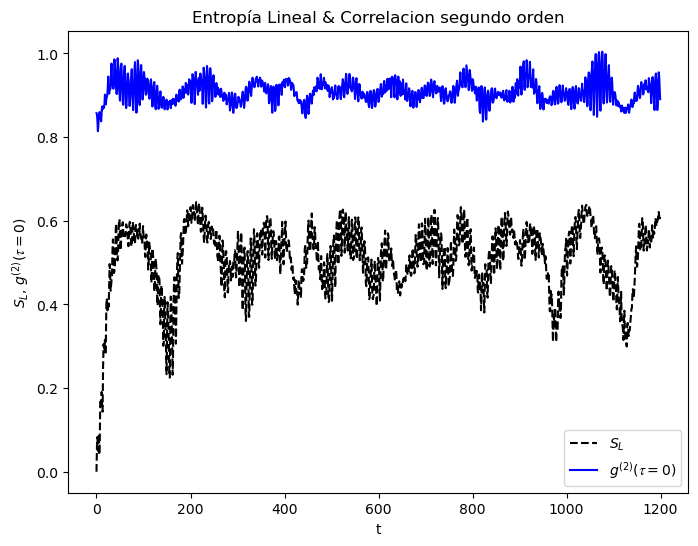

In [350]:
entropiaycorrelacion(tiempo)

(<Figure size 800x600 with 2 Axes>, <Axes: title={'center': 'p_ph'}>)

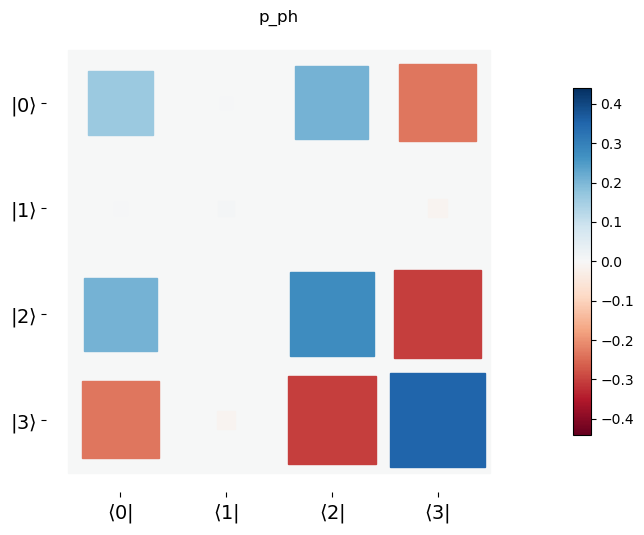

In [351]:
mdr(3,1)

(<Figure size 800x600 with 2 Axes>, <Axes: title={'center': 'p_D'}>)

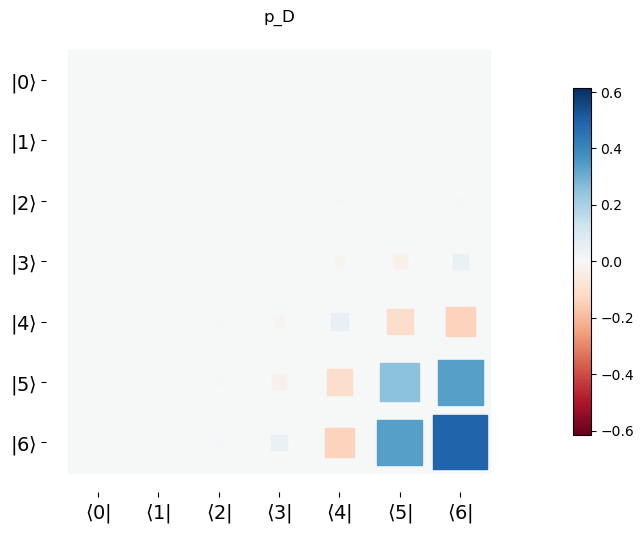

In [352]:
mdr(3,0)

### Ambas

In [353]:
N=4
jmin=tensor(jmat(j,'-'), identity(N))
a=tensor(identity(jmin.dims[0][0]),destroy(N))

#Lo que me hace el hamiltoniano
def dipolo(N,n,j,wc,wa,A,tising,tdipolo):
    #Operadores de momentum angular para los emisores
    jz=tensor(jmat(j,'z'), identity(N))
    jmin=tensor(jmat(j,'-'), identity(N))
    jmax=tensor(jmat(j,'+'), identity(N))
    a=tensor(identity(jmin.dims[0][0]),destroy(N))
    g=A/((n)**(1/2))

    #Hamiltoniano
    dipolo=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax)+tising*jz+tdipolo*(jmax+jmin)
    return dipolo

#Este es mi hamiltoniano
este=dipolo(4,3,j,1,1,0.1,2*0.01,2*0.4)   

# -----------------------------------------------------------------------------

#Forma de hallar la dinámica

tiempo=1200

def dinamicasin(n0,n3,tiempo,htc):
    star=n0*p0+n3*p3
    initial=tensor(d0,star)
    tlist=np.linspace(start=0,stop=tiempo,num=tiempo)
    resultado=sesolve(htc, initial, tlist, e_ops=None, args=None, options=None, progress_bar=True, _safe_mode=True)
    return resultado

resultado=dinamicasin(((2)**(1/2))/3, ((7)**(1/2))/3,tiempo,este)
len(resultado.states)

10.0%. Run time:   0.07s. Est. time left: 00:00:00:00
20.0%. Run time:   0.11s. Est. time left: 00:00:00:00
30.0%. Run time:   0.21s. Est. time left: 00:00:00:00
40.0%. Run time:   0.26s. Est. time left: 00:00:00:00
50.0%. Run time:   0.35s. Est. time left: 00:00:00:00
60.0%. Run time:   0.40s. Est. time left: 00:00:00:00
70.0%. Run time:   0.48s. Est. time left: 00:00:00:00
80.0%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.63s. Est. time left: 00:00:00:00
Total run time:   0.68s


1200

Generando gráfica:   0%|                                          | 1/1200 [00:00<01:22, 14.59it/s]


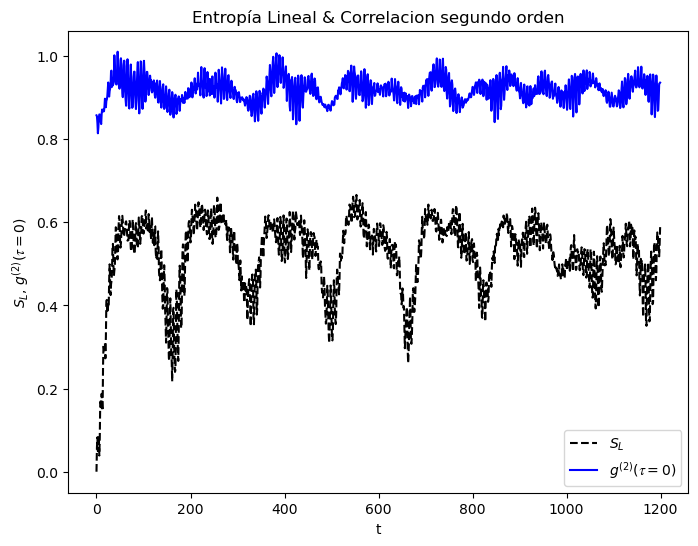

In [354]:
entropiaycorrelacion(tiempo)

(<Figure size 800x600 with 2 Axes>, <Axes: title={'center': 'p_ph'}>)

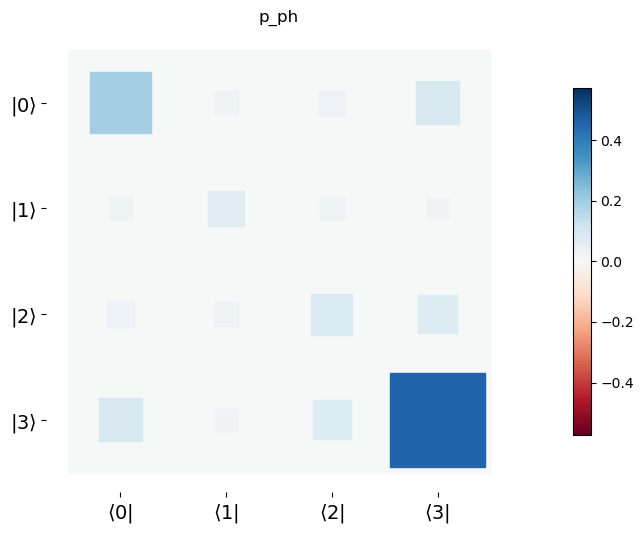

In [355]:
mdr(300,1)

(<Figure size 800x600 with 2 Axes>, <Axes: title={'center': 'p_D'}>)

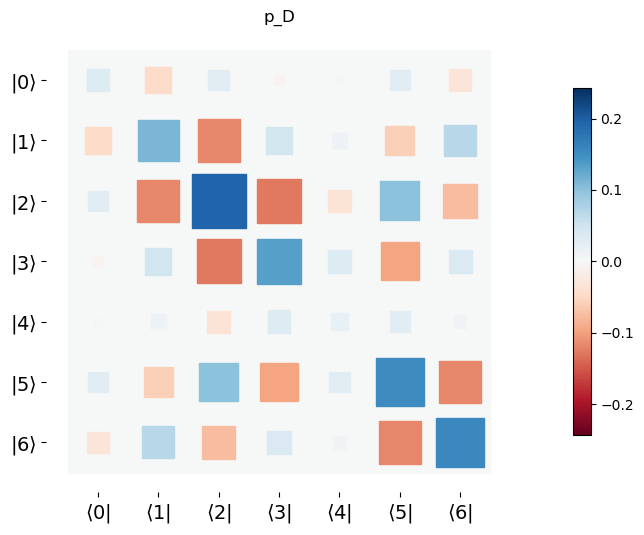

In [356]:
mdr(300,0)